<a href="https://colab.research.google.com/github/victorncg/financas_quantitativas/blob/main/AGRO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Cost of carry

#### Simulate brownian motion

In [40]:
mu = 0.001
sigma = 0.01
start_price = 5

In [43]:
np.random.seed(0)
returns = np.random.normal(loc=mu, scale=sigma, size=365)
price = start_price*(1+returns).cumprod()

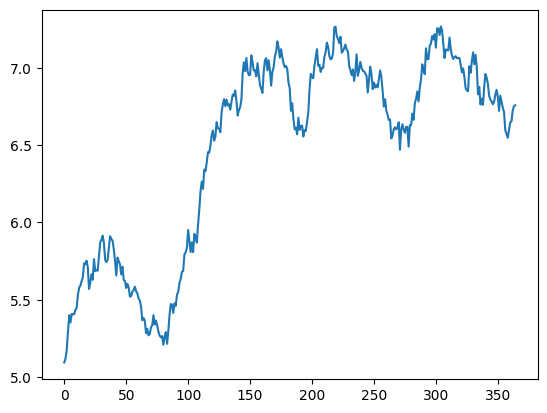

In [44]:
plt.plot(price)

#### Criação de dataframe de cost of carry

In [54]:
precos = list(price)

In [21]:
lista = list()

In [22]:
lista.append(2)

In [23]:
lista

[2]

In [31]:
import random

lis = list()

# Random float number
for i in range(365):
  x = random.uniform(90,100)
  lis.append(x)

In [11]:
# Importando a biblioteca pandas para manipulação de dados
import pandas as pd

# Dados de exemplo (preços e datas)
datas = pd.date_range(start='2023-01-01', end='2023-12-31')

In [16]:
precos + list( range(100,150))

TypeError: ignored

In [12]:
datas.shape

(365,)

In [14]:
precos

In [47]:
# Criando um DataFrame com os dados
df = pd.DataFrame({'Data': datas, 'Preço': precos})

# Definindo a taxa de juros e o custo de armazenamento
taxa_juros = 0.05
custo_armazenamento = 0.02

# Calculando o Cost of Carry
df['Cost of Carry'] = df['Preço'].shift(1) * (1 + taxa_juros) + custo_armazenamento - df['Preço']

# Exibindo o DataFrame resultante
print(df)


          Data     Preço  Cost of Carry
0   2023-01-01  5.093203            NaN
1   2023-01-02  5.118677       0.249186
2   2023-01-03  5.173894       0.220717
3   2023-01-04  5.295009       0.157579
4   2023-01-05  5.399191       0.180568
..         ...       ...            ...
360 2023-12-27  6.648460       0.297125
361 2023-12-28  6.655360       0.345524
362 2023-12-29  6.724033       0.284095
363 2023-12-30  6.753616       0.326618
364 2023-12-31  6.759311       0.351986

[365 rows x 3 columns]


In [48]:
df.index = pd.to_datetime(df['Data'])

#### Exibição das informações

In [49]:
import yfinance as yf
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd
import numpy as np
import datetime

In [52]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Create figure with secondary y-axis
fig = make_subplots(specs=[[{"secondary_y": True}]])

# Add traces
fig.add_trace(
    go.Scatter(x = df.index, y = df['Preço'], name="Preço"),
    secondary_y=True,
)

fig.add_trace(
    go.Scatter(x = df.index, y = df['Cost of Carry'], name="Cost of Carry"),
    secondary_y=False,
)

# Add figure title
fig.update_layout(
    title_text="Cost of Carry - Simulation"
)

# Set x-axis title
fig.update_xaxes(title_text="Data")

# Set y-axes titles
fig.update_yaxes(title_text="Preço", secondary_y=False)
fig.update_yaxes(title_text="Cost of Carry", secondary_y=True)

fig.show()

#### Novo exemplo

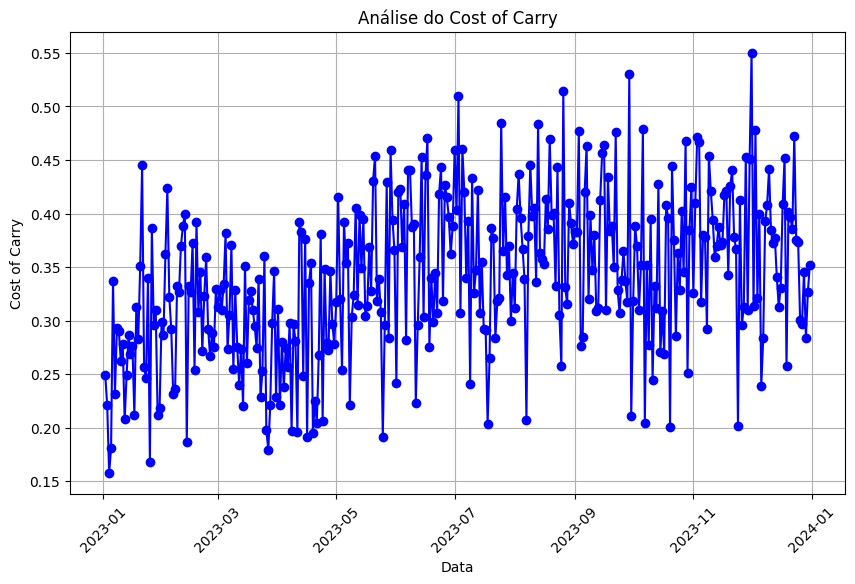

In [55]:
import pandas as pd
import matplotlib.pyplot as plt

# Dados de exemplo (preços e datas)
datas = pd.date_range(start='2023-01-01', end='2023-12-31')

# Criando um DataFrame com os dados
df = pd.DataFrame({'Data': datas, 'Preço': precos})

# Definindo a taxa de juros e o custo de armazenamento
taxa_juros = 0.05
custo_armazenamento = 0.02

# Calculando o Cost of Carry
df['Cost of Carry'] = df['Preço'].shift(1) * (1 + taxa_juros) + custo_armazenamento - df['Preço']

# Plotando o gráfico
plt.figure(figsize=(10, 6))
plt.plot(df['Data'], df['Cost of Carry'], marker='o', linestyle='-', color='b')
plt.xlabel('Data')
plt.ylabel('Cost of Carry')
plt.title('Análise do Cost of Carry')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()


# Operações estruturadas

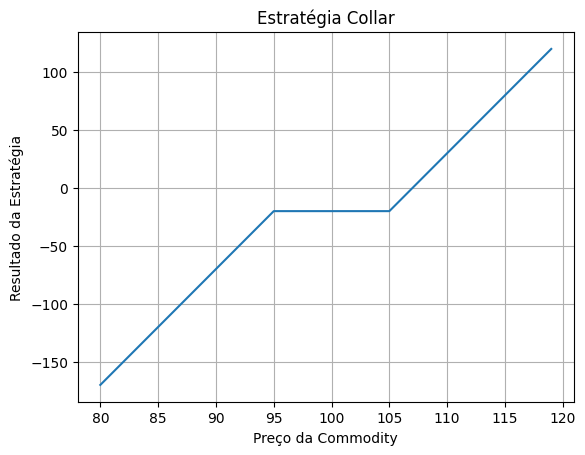

In [57]:
import numpy as np
import matplotlib.pyplot as plt

# Parâmetros da estratégia
preco_spot = 100
preco_opcao_compra = 105
preco_opcao_venda = 95
quantidade_contratos = 10
custo_opcao_venda = 2
preco_range = np.arange(80, 120, 1)

# Cálculo do resultado da estratégia
resultado = []
for preco in preco_range:
    resultado.append(quantidade_contratos *
     (max(0, preco - preco_opcao_compra) -
      max(0, preco_opcao_venda - preco) -
      custo_opcao_venda))

# Plot do resultado
plt.plot(preco_range, resultado)
plt.xlabel('Preço da Commodity')
plt.ylabel('Resultado da Estratégia')
plt.title('Estratégia Collar')
plt.grid(True)
plt.show()


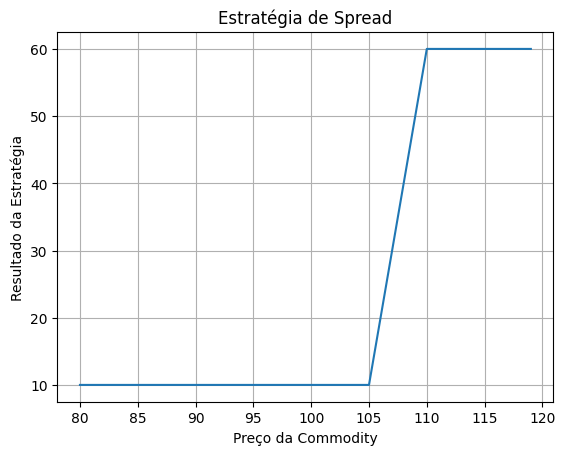

In [58]:
import numpy as np
import matplotlib.pyplot as plt

# Parâmetros da estratégia
preco_spot = 100
preco_opcao_compra1 = 105
preco_opcao_compra2 = 110
quantidade_contratos = 10
custo_opcao_compra1 = 2
custo_opcao_compra2 = 3
preco_range = np.arange(80, 120, 1)

# Cálculo do resultado da estratégia
resultado = []
for preco in preco_range:
    resultado.append(quantidade_contratos * ((max(0, preco - preco_opcao_compra1) - custo_opcao_compra1) - (max(0, preco - preco_opcao_compra2) - custo_opcao_compra2)))

# Plot do resultado
plt.plot(preco_range, resultado)
plt.xlabel('Preço da Commodity')
plt.ylabel('Resultado da Estratégia')
plt.title('Estratégia de Spread')
plt.grid(True)
plt.show()


# Arbitragem

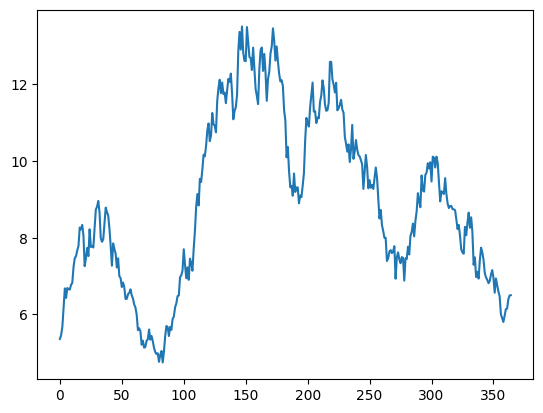

In [97]:
mu = 0.002
sigma = 0.04
start_price = 5
np.random.seed(0)
returns = np.random.normal(loc=mu, scale=sigma, size=365)
preco_atual = start_price*(1+returns).cumprod()
plt.plot(preco_atual)


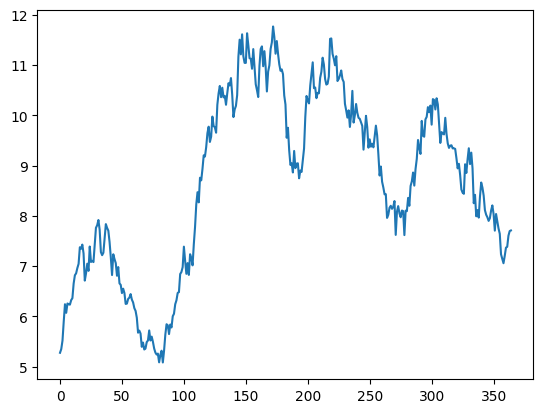

In [104]:
mu = 0.002
sigma = 0.03
start_price = 5
np.random.seed(0)
returns = np.random.normal(loc=mu, scale=sigma, size=365)
preco_futuro = start_price*(1+returns).cumprod()
plt.plot(preco_futuro)


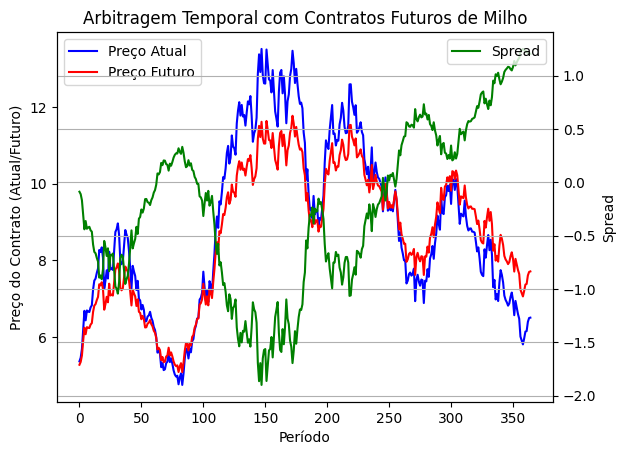

In [105]:
import numpy as np
import matplotlib.pyplot as plt

# Simulação de preços do contrato atual e futuro
#preco_atual = np.random.normal(300, 10, 100)  # Exemplo de preços atuais do milho
#preco_futuro = np.random.normal(305, 8, 100)  # Exemplo de preços futuros do milho

# Cálculo do spread (diferença de preço)
spread = preco_futuro - preco_atual

# Plot do gráfico
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

ax1.plot(preco_atual, color='b', label='Preço Atual')
ax1.plot(preco_futuro, color='r', label='Preço Futuro')
ax2.plot(spread, color='g', label='Spread')

ax1.set_xlabel('Período')
ax1.set_ylabel('Preço do Contrato (Atual/Futuro)')
ax2.set_ylabel('Spread')

ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.title('Arbitragem Temporal com Contratos Futuros de Milho')
plt.grid(True)
plt.show()


# Contrato de NDF

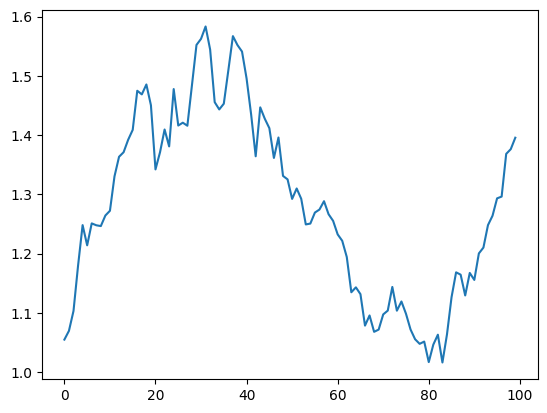

In [ ]:
mu = 0.002
sigma = 0.03
start_price = 1
np.random.seed(0)
returns = np.random.normal(loc=mu, scale=sigma, size=100)
preco_futuro = start_price*(1+returns).cumprod()
plt.plot(preco_futuro)

In [ ]:
np.random.uniform(1.0, 1.5, 100)

array([1.42857154, 1.21263768, 1.01833361, 1.24539823, 1.47759987,
       1.22507615, 1.33581545, 1.09862514, 1.01134812, 1.41874994,
       1.20022305, 1.39563377, 1.11271163, 1.26355346, 1.30329929,
       1.14540956, 1.45512451, 1.21074467, 1.22166958, 1.16459768,
       1.46836233, 1.49820867, 1.34772484, 1.45875377, 1.05019026,
       1.25452098, 1.01691806, 1.27347954, 1.40672922, 1.01404122,
       1.12663959, 1.0871941 , 1.4147488 , 1.37928884, 1.28232575,
       1.14163907, 1.02690433, 1.27000293, 1.2266794 , 1.44290413,
       1.05320463, 1.24334073, 1.148182  , 1.13432397, 1.46977914,
       1.00811895, 1.42843952, 1.2051393 , 1.20296935, 1.45379316,
       1.33415791, 1.33144463, 1.34024938, 1.22684833, 1.21373236,
       1.3548924 , 1.48993889, 1.2048222 , 1.05640604, 1.17579821,
       1.08204464, 1.1102168 , 1.28853254, 1.22775483, 1.03789607,
       1.35532595, 1.47946475, 1.0587306 , 1.08512469, 1.08090532,
       1.10607572, 1.01446365, 1.20745394, 1.1821952 , 1.41473

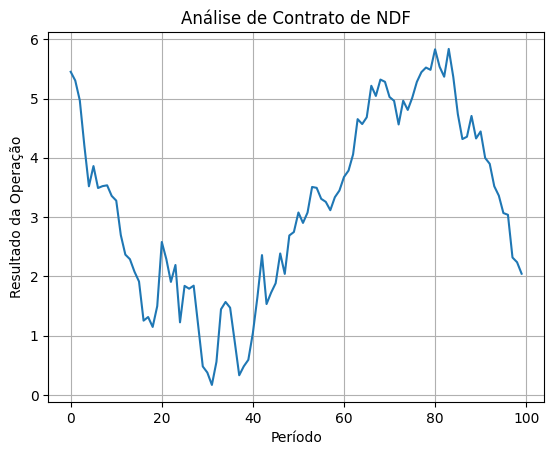

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Dados de exemplo
preco_contrato = 1.6
preco_mercado = preco_futuro
quantidade_contratos = 10

# Cálculo do resultado da operação
resultado = quantidade_contratos * (preco_contrato - preco_mercado)

# Plot do gráfico
plt.plot(resultado)
plt.xlabel('Período')
plt.ylabel('Resultado da Operação')
plt.title('Análise de Contrato de NDF')
plt.grid(True)
plt.show()
